In [1]:
# Original source code by David Johnson @djcomlab

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
!python -m plantuml ../figures/routines_model.txt  # requires internet connection to PlantUML server

[{'filename': '../figures/routines_model.txt', 'gen_success': True}]


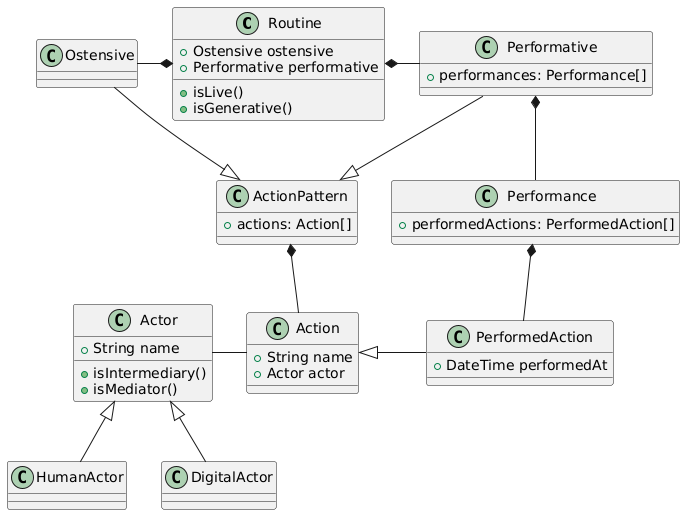

In [4]:
from IPython.display import Image
Image("../figures/routines_model.png")

In [5]:
def convert_days_to_dhm(days):
    total_seconds = int(days * 24 * 3600)
    days, remainder = divmod(total_seconds, 24 * 3600)
    hours, remainder = divmod(remainder, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{days} days {hours:02}:{minutes:02}"

In [6]:
summary_statistics = pd.read_excel('../data/summary.xlsx')
summary_statistics['Avg. duration'] = summary_statistics['Avg. duration'].apply(convert_days_to_dhm)
summary_statistics

,Recurrent action pattern,No. events,No. comments,No. unique actors,Avg. duration
0,O/C+/CL,26007,11764,1735,105 days 12:33
1,O/CL,14000,2308,1166,24 days 10:57
2,O/C/CL,13439,3442,1113,55 days 04:41
3,O/L/C/CL,3636,676,391,78 days 17:36
4,O/RV+/CL,5084,189,260,4 days 07:45
5,O/RV/CL,3246,203,295,3 days 02:17
6,O/L+/RV/CL,3739,114,184,4 days 14:45
7,O/L+/RV+/CL,4544,72,149,5 days 13:57
8,O/C+/M/C+/CL,6462,3060,408,165 days 13:57
9,O/L/C+/CL,3203,1214,405,76 days 09:19


In [7]:
print(summary_statistics.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.1f}".format))

\begin{tabular}{lrrrl}
\toprule
Recurrent action pattern & No. events & No. comments & No. unique actors & Avg. duration \\
\midrule
O/C+/CL & 26007 & 11764 & 1735 & 105 days 12:33 \\
O/CL & 14000 & 2308 & 1166 & 24 days 10:57 \\
O/C/CL & 13439 & 3442 & 1113 & 55 days 04:41 \\
O/L/C/CL & 3636 & 676 & 391 & 78 days 17:36 \\
O/RV+/CL & 5084 & 189 & 260 & 4 days 07:45 \\
O/RV/CL & 3246 & 203 & 295 & 3 days 02:17 \\
O/L+/RV/CL & 3739 & 114 & 184 & 4 days 14:45 \\
O/L+/RV+/CL & 4544 & 72 & 149 & 5 days 13:57 \\
O/C+/M/C+/CL & 6462 & 3060 & 408 & 165 days 13:57 \\
O/L/C+/CL & 3203 & 1214 & 405 & 76 days 09:19 \\
\bottomrule
\end{tabular}



In [8]:
transition_matrix = pd.read_excel('../data/transition_matrix.xlsx', index_col=0)

In [9]:
print(transition_matrix.to_latex(index=True, formatters={"name": str.upper}, float_format="{:.4f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
 & assigned & closed & commented & labeled & mentioned & opened & reviewed & unlabeled \\
\midrule
assigned & 0.0124 & 0.1661 & 0.4435 & 0.0601 & 0.0035 & 0 & 0.1555 & 0.1590 \\
closed & 0.0000 & 0.0089 & 0.8691 & 0.0195 & 0.0821 & 0 & 0.0124 & 0.0080 \\
commented & 0.0018 & 0.0864 & 0.5444 & 0.0177 & 0.2926 & 0 & 0.0505 & 0.0066 \\
labeled & 0.0024 & 0.0563 & 0.3755 & 0.3159 & 0.0102 & 0 & 0.2006 & 0.0390 \\
mentioned & 0.0013 & 0.0486 & 0.5835 & 0.0317 & 0.2374 & 0 & 0.0894 & 0.0082 \\
opened & 0.0019 & 0.0770 & 0.4210 & 0.3018 & 0.1023 & 0 & 0.0909 & 0.0051 \\
reviewed & 0.0026 & 0.1880 & 0.3437 & 0.0461 & 0.0240 & 0 & 0.3887 & 0.0069 \\
unlabeled & 0.0049 & 0.1300 & 0.3375 & 0.4014 & 0.0036 & 0 & 0.0422 & 0.0804 \\
\bottomrule
\end{tabular}



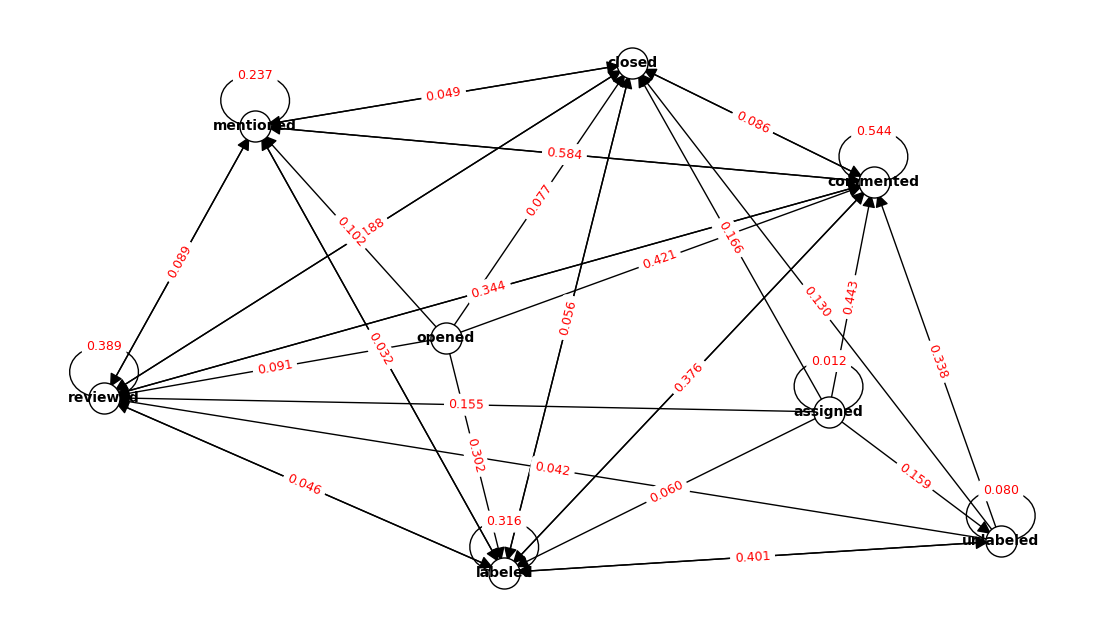

In [10]:
G = nx.DiGraph()

for index, row in transition_matrix.iterrows():
    G.add_node(index)
    for col in transition_matrix.columns:
        prob = transition_matrix.at[index, col]
        if prob > 0.01:  # only if there's a transition probability greater than 1%, otherwise don't show
            G.add_edge(index, col, weight=prob)

plt.figure(figsize=(14, 8))  # figure size for portrait layout
pos = nx.spring_layout(G, seed=88)

nx.draw_networkx_nodes(G, pos, node_size=500, node_color='white', edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, arrowstyle="-|>", arrowsize=20, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f"{v:.3f}" for k, v in edge_labels.items()}  # 3 decimal places

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=9, font_color='red')

plt.axis('off')
plt.savefig("../figures/markov_chain_plot.pdf", bbox_inches='tight')